## Wikipedia Popular (and not so...) Articles

  * What are the most popular articles by year?
  * Do they follow news and events that year?

In [2]:
from __future__ import division
import gcp.bigquery as bq
import matplotlib.pyplot as plot
import numpy as np

In [3]:
%%sql --module wikipedia
SELECT title, YEAR(SEC_TO_TIMESTAMP(timestamp)) as year, count(*) as revisions
FROM [publicdata:samples.wikipedia]
WHERE wp_namespace = 0
AND is_bot is NULL
GROUP BY year, title
HAVING count(*) > 100

In [4]:
%%bigquery sample --query wikipedia

QueryResultsTable job_Txd-CYCLK6QGzQOguiToJ8CilBk

QueryResultsTable job_Txd-CYCLK6QGzQOguiToJ8CilBk

QueryResultsTable job_Txd-CYCLK6QGzQOguiToJ8CilBk

In [5]:
df = bq.Query(wikipedia).to_dataframe()

In [6]:
years = {}
for year in set(df['year']):
  years[year] = df[df['year'] == year].sort('revisions', ascending=False)

In [7]:
years

{2001:                  title  year  revisions
 196931     Creationism  2001        125
 175111  Deaths in 2003  2001        112,
 2002:                                            title  year  revisions
 315286                              October 2003  2002        896
 287862                                 Main Page  2002        449
 164362                         List of Canadians  2002        303
 207818                                 Anarchism  2002        284
 318728                       Jehovah's Witnesses  2002        276
 171894                            Deaths in 2003  2002        258
 298778                            George W. Bush  2002        249
 260738          List of novelists by nationality  2002        243
 166079                      Christopher Columbus  2002        242
 41119                      List of French people  2002        230
 231310              List of mathematics articles  2002        224
 151321                                  Genocide  2002     

In [8]:
years[2007]

,title,year,revisions
42669,Deaths in 2007,2007,18088
212563,Virginia Tech massacre,2007,10021
310237,List of World Wrestling Entertainment employees,2007,9825
212551,2007,2007,9048
277839,Harry Potter and the Deathly Hallows,2007,8064
115322,2007 in music,2007,6979
252728,List of Omnitrix aliens,2007,6753
40174,Blackout (Britney Spears album),2007,6573
140412,Thomas and Friends video releases,2007,6135
95317,Heroes (TV series),2007,5928


,title,year,revisions
42669,Deaths in 2007,2007,18088
212563,Virginia Tech massacre,2007,10021
310237,List of World Wrestling Entertainment employees,2007,9825
212551,2007,2007,9048
277839,Harry Potter and the Deathly Hallows,2007,8064
115322,2007 in music,2007,6979
252728,List of Omnitrix aliens,2007,6753
40174,Blackout (Britney Spears album),2007,6573
140412,Thomas and Friends video releases,2007,6135
95317,Heroes (TV series),2007,5928


,title,year,revisions
42669,Deaths in 2007,2007,18088
212563,Virginia Tech massacre,2007,10021
310237,List of World Wrestling Entertainment employees,2007,9825
212551,2007,2007,9048
277839,Harry Potter and the Deathly Hallows,2007,8064
115322,2007 in music,2007,6979
252728,List of Omnitrix aliens,2007,6753
40174,Blackout (Britney Spears album),2007,6573
140412,Thomas and Friends video releases,2007,6135
95317,Heroes (TV series),2007,5928


In [9]:
first_last = df.groupby('title').agg({'year': [np.min, np.max]})

In [10]:
first_last.head()

year      
                            amin  amax
title                                 
!!!                         2006  2008
"Awesome"                   2009  2009
"Couples"                   2008  2008
"Crocodile" Dundee          2006  2007
"Dr. Death" Steve Williams  2007  2009

In [11]:
first_last.columns

MultiIndex(levels=[[u'year'], [u'amin', u'amax']],
           labels=[[0, 0], [0, 1]])

In [12]:
first_last['span'] = first_last['year']['amax'] - first_last['year']['amin']

In [13]:
first_last['span'].max()

8

In [14]:
first_last[first_last['span'] > 7]

year       span
                     amin  amax     
title                               
Anarchism            2002  2010    8
Canada               2002  2010    8
Chess                2002  2010    8
Creationism          2001  2009    8
Deaths in 2003       2001  2009    8
Global warming       2002  2010    8
Invention            2002  2010    8
Jehovah's Witnesses  2002  2010    8
Jesus                2002  2010    8
Nicolaus Copernicus  2002  2010    8
Quebec               2002  2010    8
United States        2002  2010    8
War on Terrorism     2002  2010    8
World War II         2002  2010    8

In [15]:
first_last[first_last['span'] < 1]

year       span
                                                    amin  amax     
title                                                              
"Awesome"                                           2009  2009    0
"Couples"                                           2008  2008    0
"Happy" in Galoshes                                 2008  2008    0
"I AM" Activity                                     2007  2007    0
"Polish death camp" controversy                     2008  2008    0
"The Take Over, the Breaks Over"                    2007  2007    0
"V" Is for Vagina                                   2007  2007    0
"Weird Al" Yankovic (album)                         2008  2008    0
$pringfield (Or, How I Learned to Stop Worrying...  2007  2007    0
'03 Bonnie & Clyde                                  2008  2008    0
'Round Springfield                                  2007  2007    0
'Splosion Man                                       2009  2009    0
's-Hertogenbosch                                    2009  2009    0
(Ghost) Riders in the Sky: A Cowboy Legend          2007  2007    0
(LIVE)                                              2006  2006    0
(Miss)understood                                    2006  2006    0
(They Long to Be) Close to You                      2007  2007    0
(When You Gonna) Give It Up to Me                   2006  2006    0
(You Want To) Make a Memory                         2007  2007    0
**** Live in Phoenix                                2008  2008    0
-cide                                               2007  2007    0
...Baby One More Time Tour                          2007  2007    0
.07%                                                2007  2007    0
.280 British                                        2007  2007    0
.303 British                                        2007  2007    0
.32 ACP                                             2006  2006    0
.38 Special                                         2008  2008    0
.40 S&W                                             2007  2007    0
.400 Corbon                                         2008  2008    0
.408 Chey Tac                                       2007  2007    0
...                                                  ...   ...  ...
Ćevapčići                                           2007  2007    0
Čelebići prison camp                                2008  2008    0
Černová tragedy                                     2008  2008    0
České Budějovice                                    2007  2007    0
Đeravica                                            2008  2008    0
Đorđe Balašević                                     2006  2006    0
Đurađ II                                            2007  2007    0
Ħamrun Spartans F.C.                                2008  2008    0
Ħaġar Qim                                           2009  2009    0
İsmet İnönü                                         2006  2006    0
İzmir Institute of Technology                       2008  2008    0
İzmit                                               2007  2007    0
Śūnyatā                                             2007  2007    0
Şaka (10+1)                                         2008  2008    0
Şalom                                               2009  2009    0
Şanlıurfa                                           2007  2007    0
Şebinkarahisar                                      2007  2007    0
Şebnem Ferah                                        2006  2006    0
Šalata                                              2008  2008    0
Škoda 130/135/136                                   2006  2006    0
Škoda Fabia                                         2007  2007    0
Šokci                                               2006  2006    0
Štip                                                2007  2007    0
Żebbuġ, Malta                                       2006  2006    0
Żeligowski's Mutiny                                 2007  2007    0
Żnin                                    

year       span
                                                    amin  amax     
title                                                              
"Awesome"                                           2009  2009    0
"Couples"                                           2008  2008    0
"Happy" in Galoshes                                 2008  2008    0
"I AM" Activity                                     2007  2007    0
"Polish death camp" controversy                     2008  2008    0
"The Take Over, the Breaks Over"                    2007  2007    0
"V" Is for Vagina                                   2007  2007    0
"Weird Al" Yankovic (album)                         2008  2008    0
$pringfield (Or, How I Learned to Stop Worrying...  2007  2007    0
'03 Bonnie & Clyde                                  2008  2008    0
'Round Springfield                                  2007  2007    0
'Splosion Man                                       2009  2009    0
's-Hertogenbosch                                    2009  2009    0
(Ghost) Riders in the Sky: A Cowboy Legend          2007  2007    0
(LIVE)                                              2006  2006    0
(Miss)understood                                    2006  2006    0
(They Long to Be) Close to You                      2007  2007    0
(When You Gonna) Give It Up to Me                   2006  2006    0
(You Want To) Make a Memory                         2007  2007    0
**** Live in Phoenix                                2008  2008    0
-cide                                               2007  2007    0
...Baby One More Time Tour                          2007  2007    0
.07%                                                2007  2007    0
.280 British                                        2007  2007    0
.303 British                                        2007  2007    0
.32 ACP                                             2006  2006    0
.38 Special                                         2008  2008    0
.40 S&W                                             2007  2007    0
.400 Corbon                                         2008  2008    0
.408 Chey Tac                                       2007  2007    0
...                                                  ...   ...  ...
Ćevapčići                                           2007  2007    0
Čelebići prison camp                                2008  2008    0
Černová tragedy                                     2008  2008    0
České Budějovice                                    2007  2007    0
Đeravica                                            2008  2008    0
Đorđe Balašević                                     2006  2006    0
Đurađ II                                            2007  2007    0
Ħamrun Spartans F.C.                                2008  2008    0
Ħaġar Qim                                           2009  2009    0
İsmet İnönü                                         2006  2006    0
İzmir Institute of Technology                       2008  2008    0
İzmit                                               2007  2007    0
Śūnyatā                                             2007  2007    0
Şaka (10+1)                                         2008  2008    0
Şalom                                               2009  2009    0
Şanlıurfa                                           2007  2007    0
Şebinkarahisar                                      2007  2007    0
Şebnem Ferah                                        2006  2006    0
Šalata                                              2008  2008    0
Škoda 130/135/136                                   2006  2006    0
Škoda Fabia                                         2007  2007    0
Šokci                                               2006  2006    0
Štip                                                2007  2007    0
Żebbuġ, Malta                                       2006  2006    0
Żeligowski's Mutiny                                 2007  2007    0
Żnin                                    

year       span
                                                    amin  amax     
title                                                              
"Awesome"                                           2009  2009    0
"Couples"                                           2008  2008    0
"Happy" in Galoshes                                 2008  2008    0
"I AM" Activity                                     2007  2007    0
"Polish death camp" controversy                     2008  2008    0
"The Take Over, the Breaks Over"                    2007  2007    0
"V" Is for Vagina                                   2007  2007    0
"Weird Al" Yankovic (album)                         2008  2008    0
$pringfield (Or, How I Learned to Stop Worrying...  2007  2007    0
'03 Bonnie & Clyde                                  2008  2008    0
'Round Springfield                                  2007  2007    0
'Splosion Man                                       2009  2009    0
's-Hertogenbosch                                    2009  2009    0
(Ghost) Riders in the Sky: A Cowboy Legend          2007  2007    0
(LIVE)                                              2006  2006    0
(Miss)understood                                    2006  2006    0
(They Long to Be) Close to You                      2007  2007    0
(When You Gonna) Give It Up to Me                   2006  2006    0
(You Want To) Make a Memory                         2007  2007    0
**** Live in Phoenix                                2008  2008    0
-cide                                               2007  2007    0
...Baby One More Time Tour                          2007  2007    0
.07%                                                2007  2007    0
.280 British                                        2007  2007    0
.303 British                                        2007  2007    0
.32 ACP                                             2006  2006    0
.38 Special                                         2008  2008    0
.40 S&W                                             2007  2007    0
.400 Corbon                                         2008  2008    0
.408 Chey Tac                                       2007  2007    0
...                                                  ...   ...  ...
Ćevapčići                                           2007  2007    0
Čelebići prison camp                                2008  2008    0
Černová tragedy                                     2008  2008    0
České Budějovice                                    2007  2007    0
Đeravica                                            2008  2008    0
Đorđe Balašević                                     2006  2006    0
Đurađ II                                            2007  2007    0
Ħamrun Spartans F.C.                                2008  2008    0
Ħaġar Qim                                           2009  2009    0
İsmet İnönü                                         2006  2006    0
İzmir Institute of Technology                       2008  2008    0
İzmit                                               2007  2007    0
Śūnyatā                                             2007  2007    0
Şaka (10+1)                                         2008  2008    0
Şalom                                               2009  2009    0
Şanlıurfa                                           2007  2007    0
Şebinkarahisar                                      2007  2007    0
Şebnem Ferah                                        2006  2006    0
Šalata                                              2008  2008    0
Škoda 130/135/136                                   2006  2006    0
Škoda Fabia                                         2007  2007    0
Šokci                                               2006  2006    0
Štip                                                2007  2007    0
Żebbuġ, Malta                                       2006  2006    0
Żeligowski's Mutiny                                 2007  2007    0
Żnin                                    

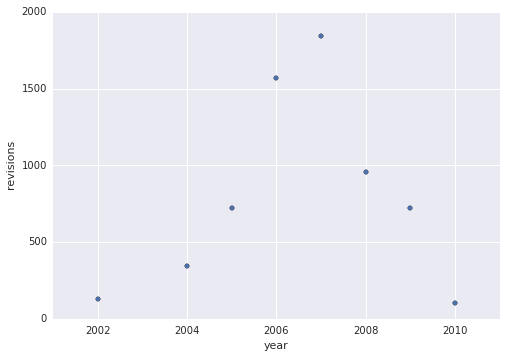

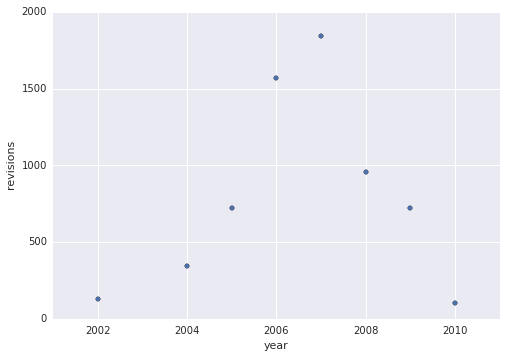

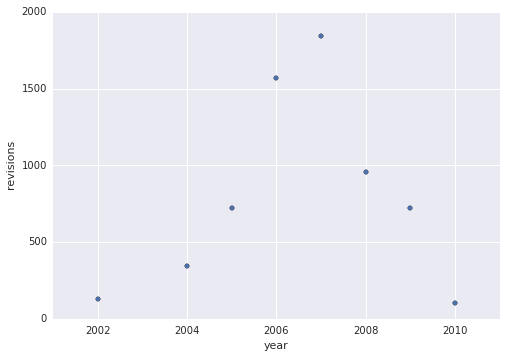

In [16]:
nc = df[df['title'] == 'Nicolaus Copernicus']
nc.plot(kind='scatter', x='year', y='revisions')


### Next Steps

  * Line chart of popularity over time?
  * Comparison with actual news database (how many stories overlap)
  * NLP Study of edits and the potential "controversies" surrounding the articles with the most revisions
  * Most and least popular "one hit wonders"
  * Scraper or DB download for more recent articles
  